### First, we will read the drug response summary data exported in our Python notebook into _R_.

In [1]:
summary_tissue=read.csv('tissue_for_plot.csv')

### Next, we add the `ggplot2` package to our R library and set some plotting options.

In [2]:
library(ggplot2)
options(repr.plot.res=800,repr.plot.width=10, repr.plot.height=6)


### Then, we plot the number of cell lines and compounds tested in each tissue type.

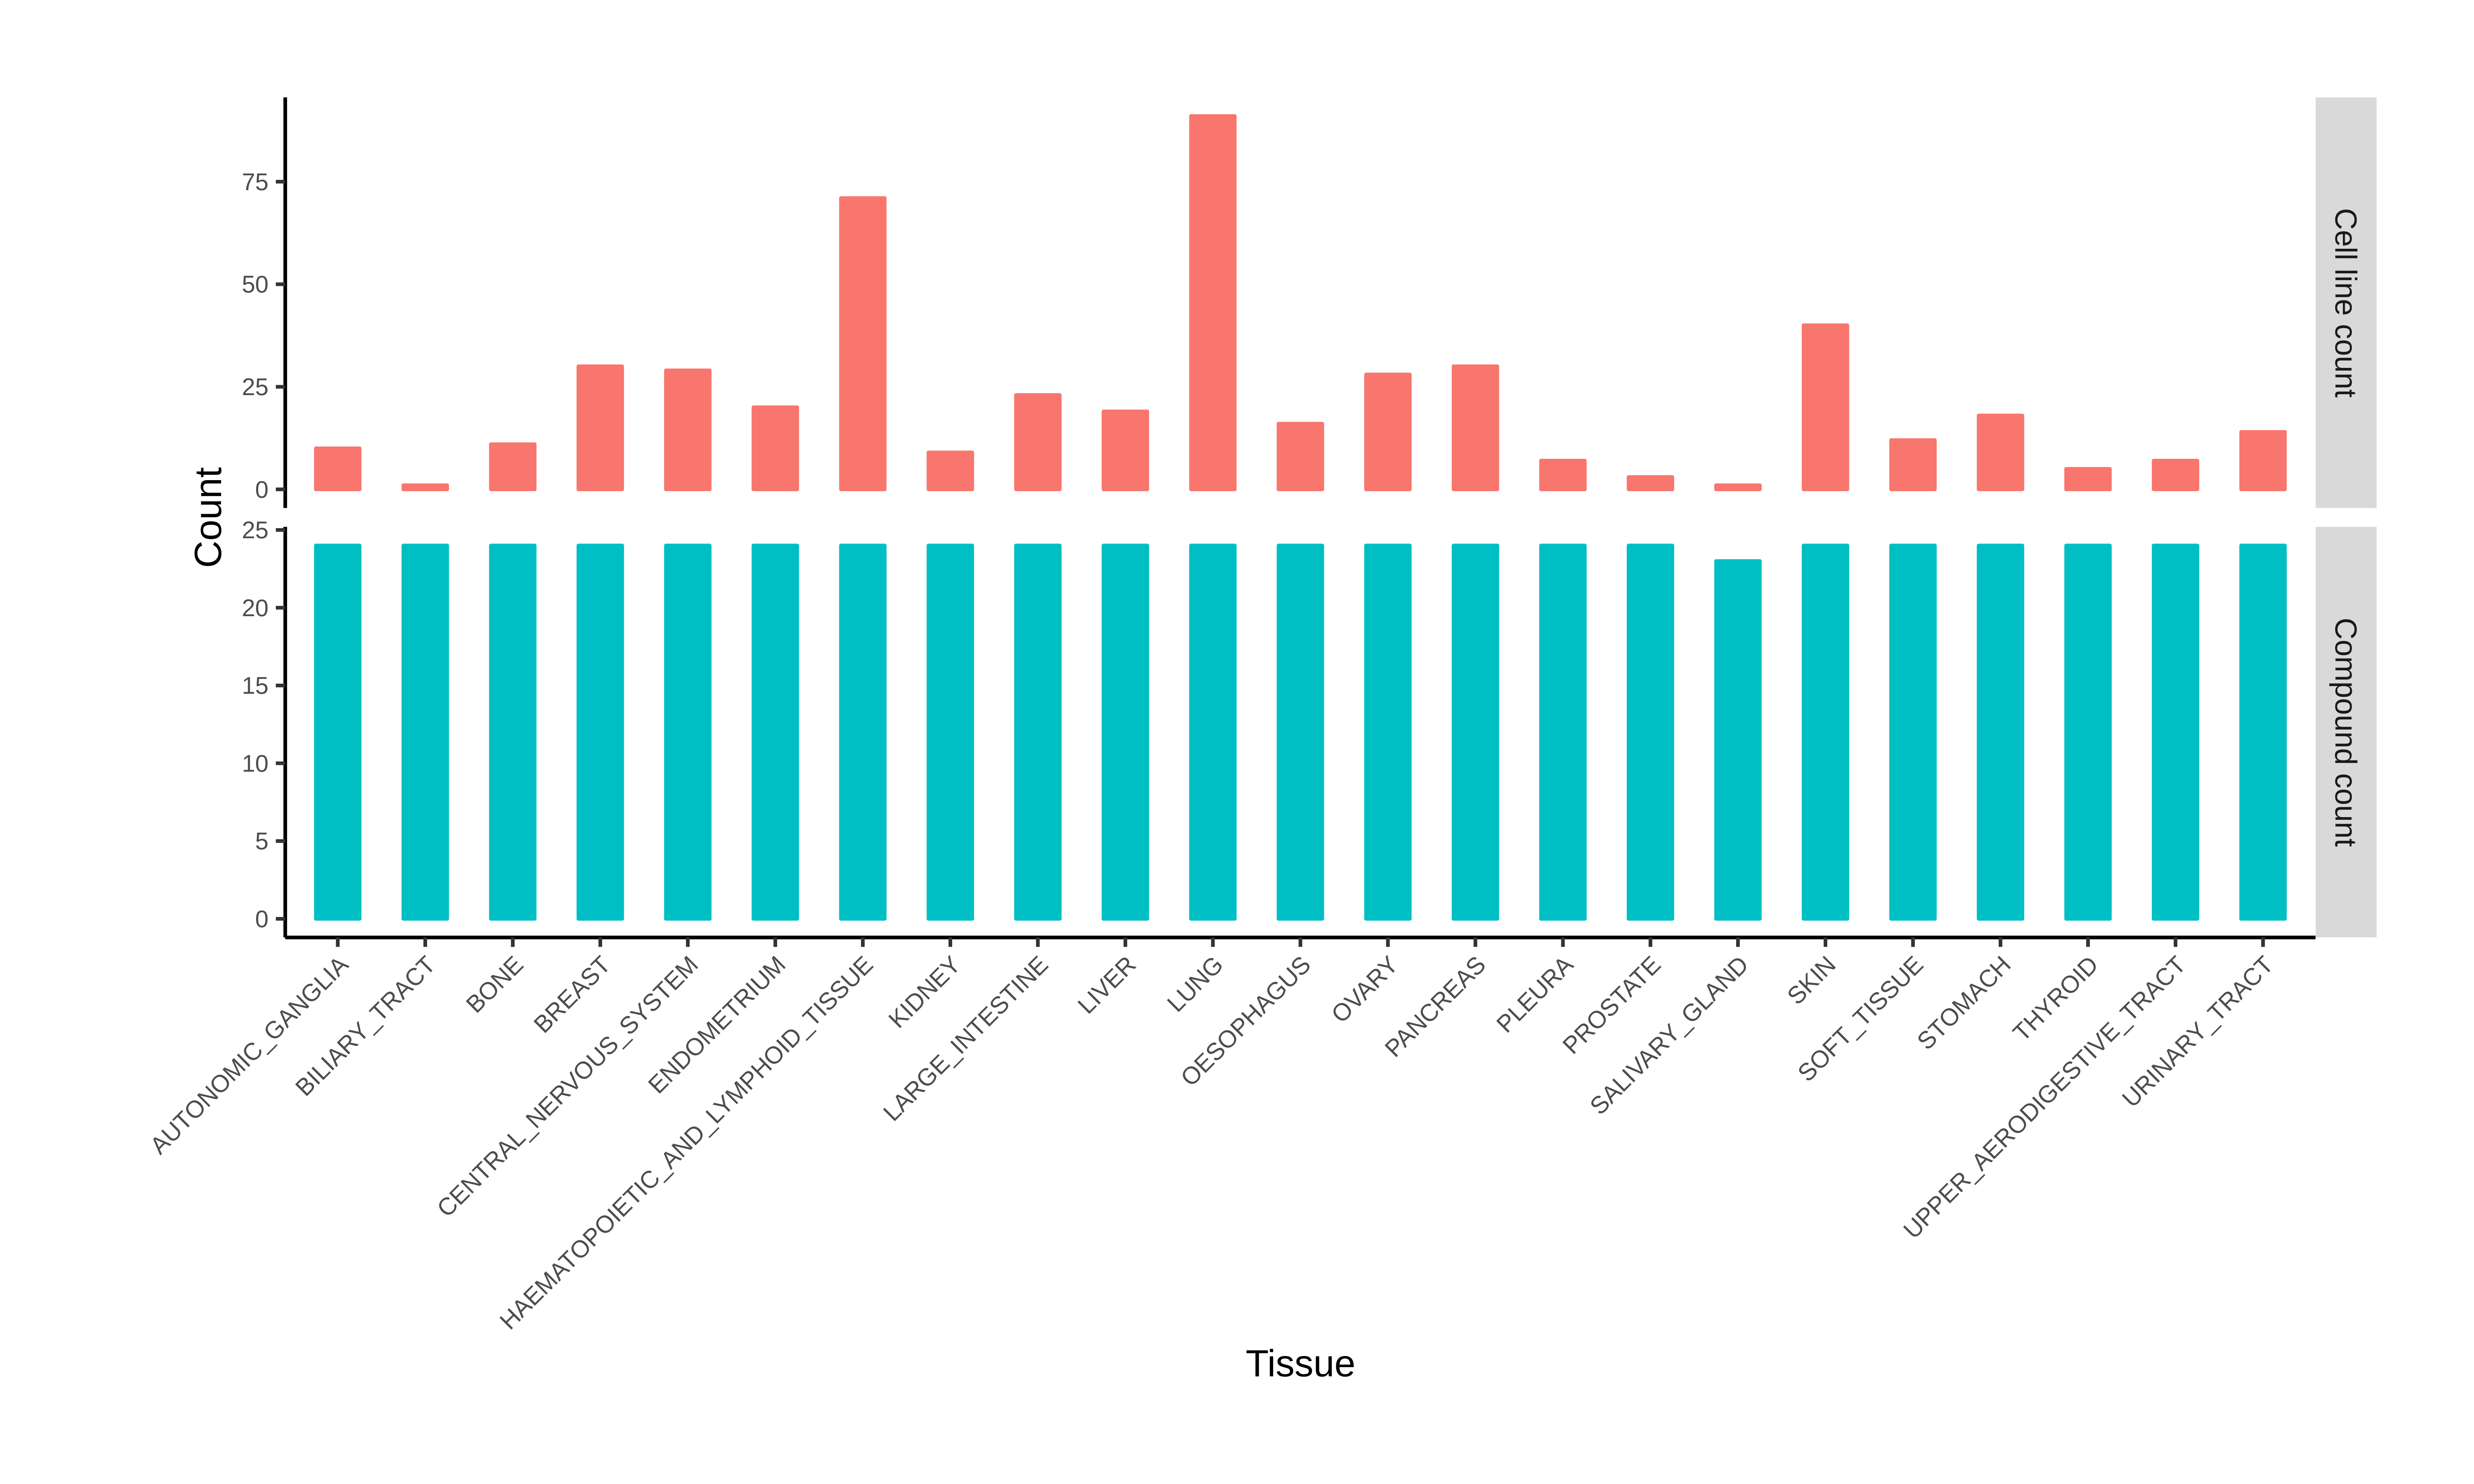

In [3]:
ggplot(summary_tissue, aes(x = Tissue, y = Count,group = 1)) + geom_col(width = 0.5,aes(x=Tissue,y = Count,color = type, fill=type)) +
  facet_grid(type ~ ., scales = "free_y") + theme(legend.position = "none")+
  theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank(), panel.background = element_blank(), axis.line = element_line(colour = "black"))+
  theme(axis.text.x=element_text(angle=45, hjust=1))+theme(axis.text=element_text(size=7)) + theme(plot.margin = unit(c(1,1,1,2), "cm"))

* From this plot we can see that the number of cell lines per tissue type varies.
* However, roughly the same number of unique compounds was tested in each tissue type.

### Finally, we read in the drug activity data to create a heatmap of the average sensitivity of each tissue type to each compound.

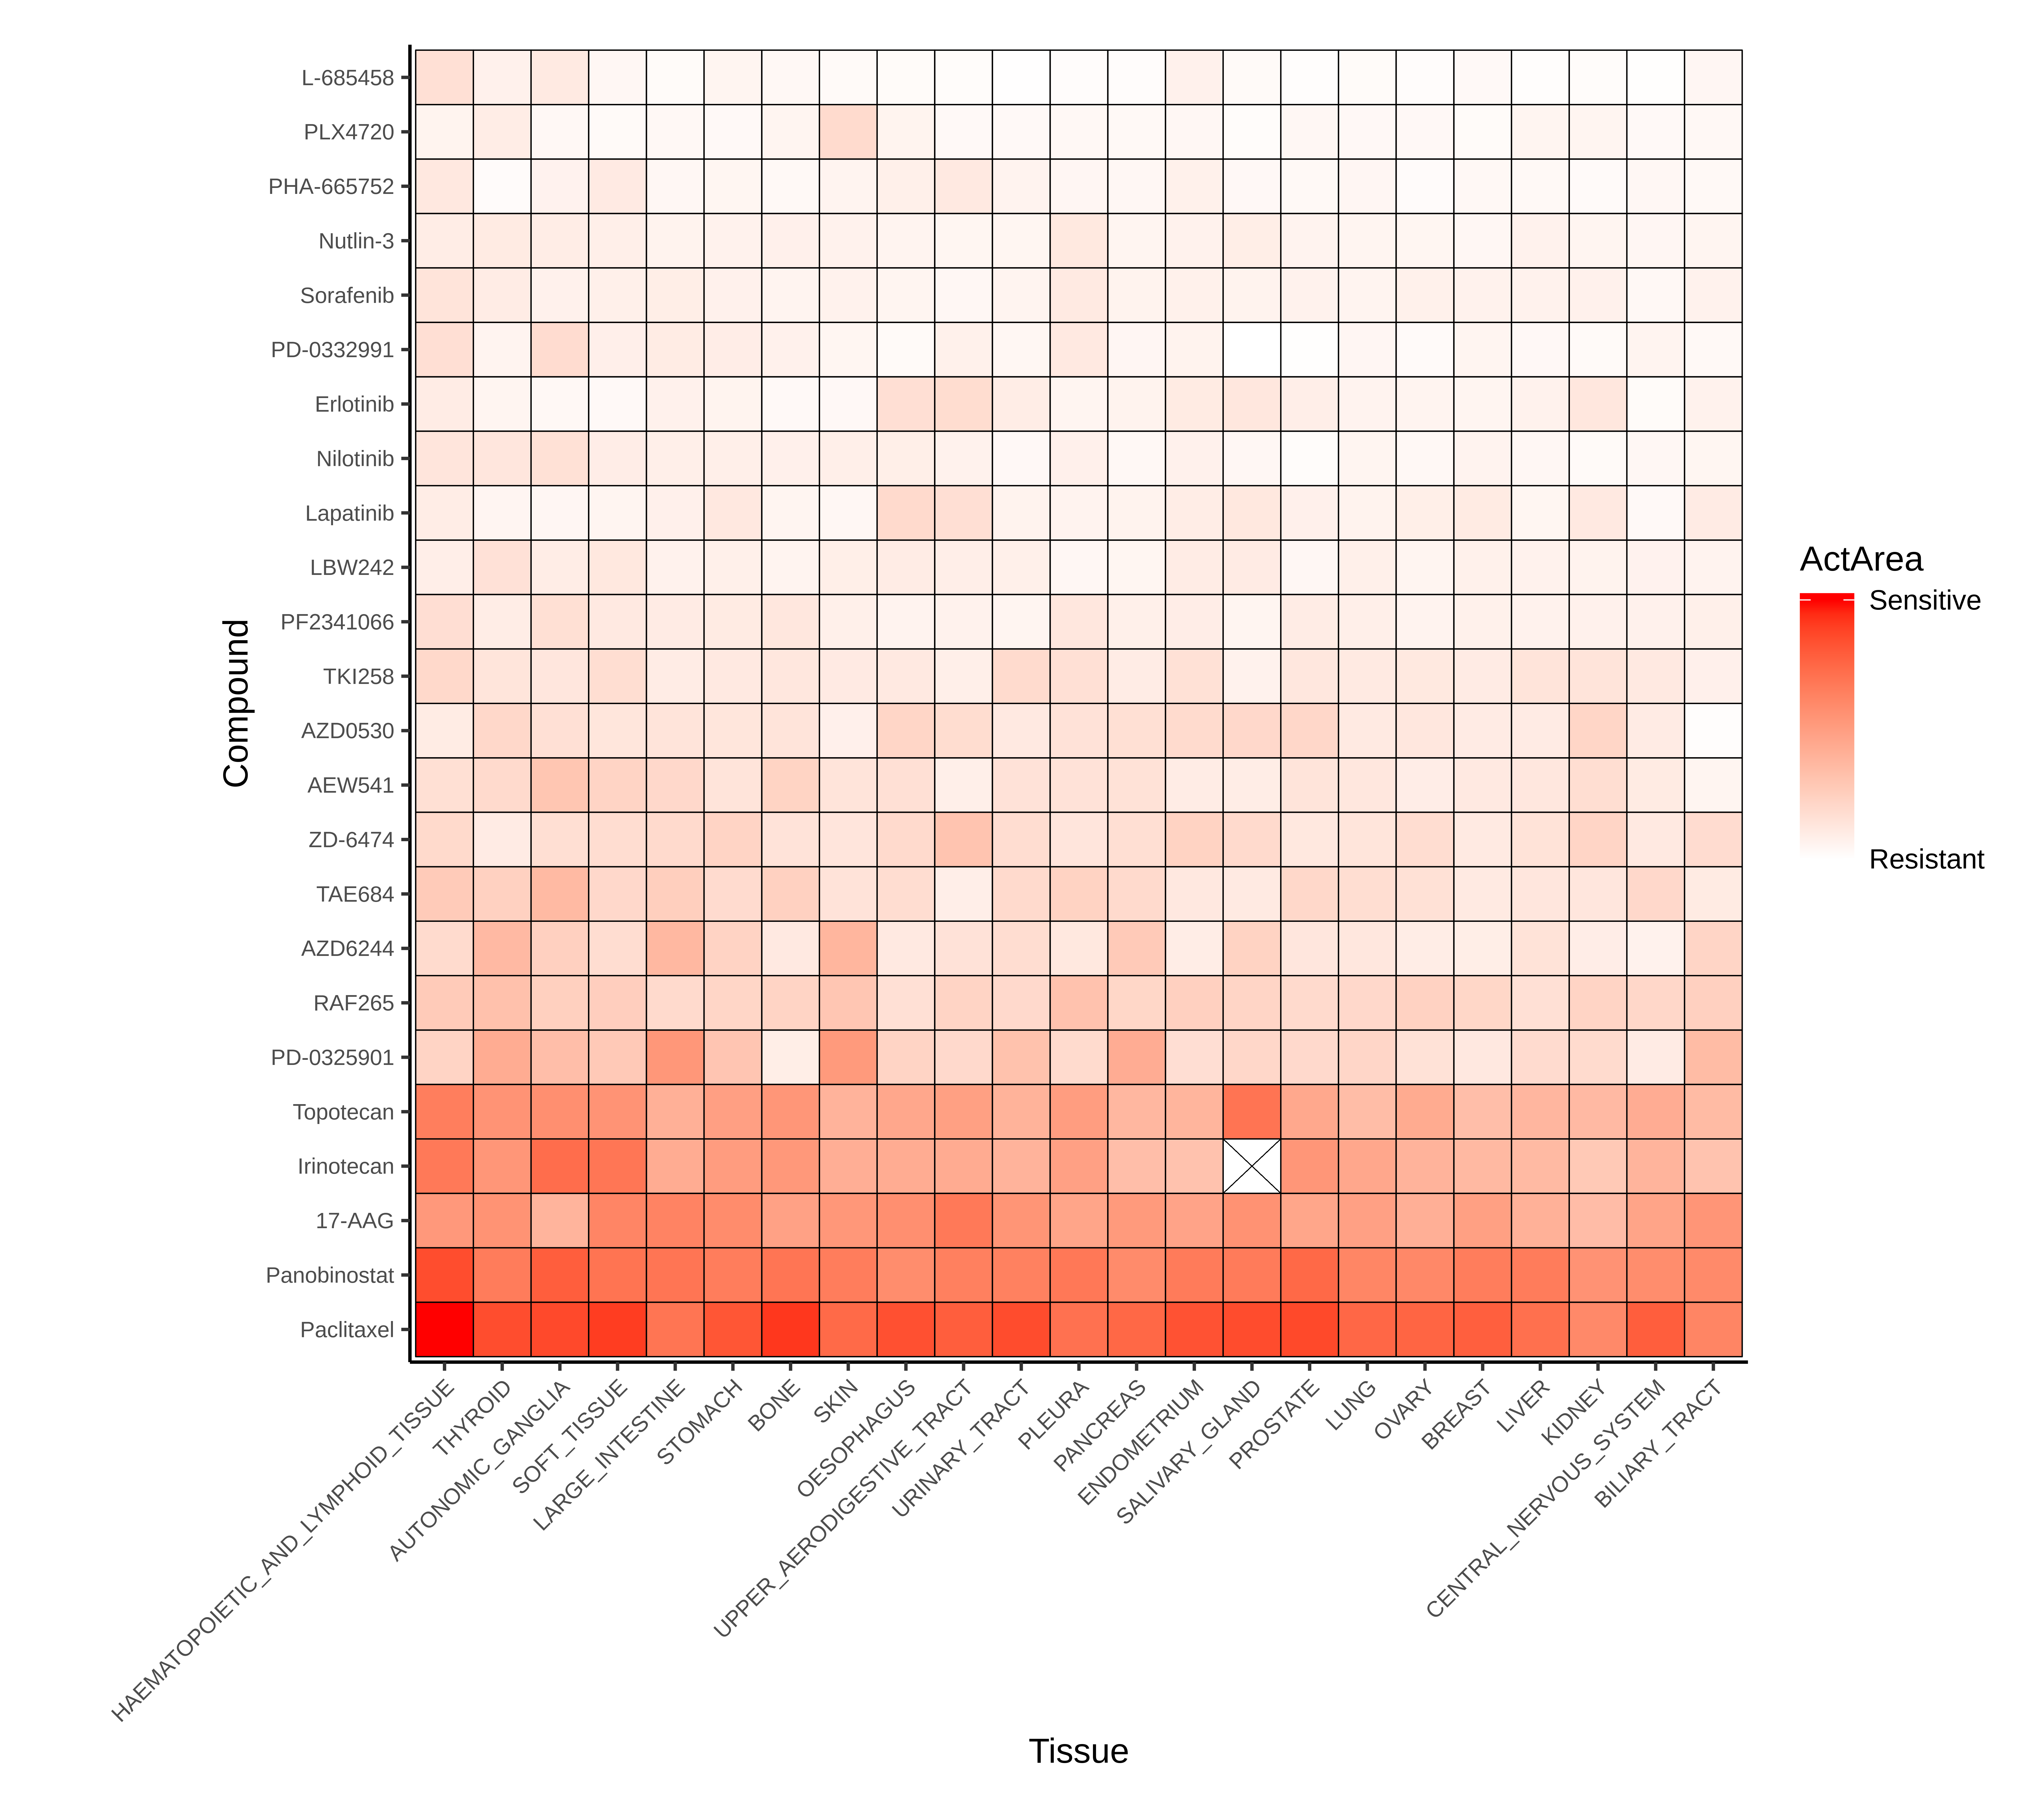

In [4]:
muti_curve = read.csv('multiple_curve_2.csv')
names(muti_curve) <- c('Compound','Tissue','EC50','IC50','ActArea','MaxActivity')

order_t = read.csv('tissue_order.csv')
order_t1 = order_t[,1]
order_c = read.csv('compound_order.csv')
order_c1 = order_c[,1]

muti_curve$Tissue <- factor(muti_curve$Tissue, levels=order_t1)
muti_curve$Compound <- factor(muti_curve$Compound, levels=order_c1)

options(repr.plot.res=800,repr.plot.width=9, repr.plot.height=8)

ggplot(muti_curve, aes(x = Tissue, y = Compound, fill = ActArea)) + geom_tile(aes(fill = ActArea),color = "black", size = 0.2)+
  theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank(),panel.background = element_blank(), axis.line = element_line(colour = "black"))+
  theme(axis.text.x=element_text(angle=45, hjust=1))+theme(axis.text=element_text(size=7))+theme(plot.margin = unit(c(0.5,0.5,0.5,2.5), "cm")) +
  scale_fill_gradient(low = "white", high = "red",labels = c("Resistant","Sensitive"),breaks = c(min(muti_curve$ActArea), max(muti_curve$ActArea)))+
  geom_segment(data=transform(muti_curve, Tissue=as.numeric(Tissue), Compound=as.numeric(Compound)),aes(x=14.5, xend=15.5, y=3.5, yend=4.5), color="black", size=0.1)+
  geom_segment(data=transform(muti_curve, Tissue=as.numeric(Tissue), Compound=as.numeric(Compound)), aes(x=15.5, xend=14.5, y=3.5, yend=4.5), color="black", size=0.1)

* From this plot we can again see that each tissue type is most sensitive to the drugs Paclitaxel and Panobinostat.

### Many thanks to Fan Wang, Senior Bioinformatician at CTDS, for helping create the plots in this Notebook. Now we will finish up the webinar with a look at some up-coming Gen3 developments and an interactive Q&A session with our product manager, Abby George.